---
title: "Pytorch Grad!"
description: "How Gradients Work in Pytorch; A simple short implementation"
date: 2025-08-12
categories: [machine-learning, tutorials, deep-learning, pytorch]
---

At the heart of how almost every modern machine learning model learns is a process called gradient descent. The core idea is to minimize a "loss" function, which is a score that tells us how wrong our model's predictions are.

Calculating the gradients for complex models used to involve pages of manual calculus. This is where PyTorch's `autograd` engine comes in—it automatically computes these gradients for us, forming the backbone of deep learning. Let's see how it works with a simple example.

In [2]:
import torch

We'll start with a random guess for the weight w and use gradient descent to guide it toward the true value of 2.

In [3]:
# We want to find a 'w' such that y is close to w * x.
# The true 'w' is clearly 2.
X = torch.tensor([1.0, 2.0, 3.0, 4.0], dtype=torch.float32)
Y = torch.tensor([2.0, 4.0, 6.0, 8.0], dtype=torch.float32)

# Initialize our weight 'w' with a random guess.
# requires_grad=True tells PyTorch to track this tensor for gradient calculations.
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)


The key here is `requires_grad=True`. This **tag** the `w` tensor, telling PyTorch's autograd engine to keep track of every operation involving it so it can later compute gradients.

In [4]:
def forward(x):
    return w * x

def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

learning_rate = 0.01
n_iters = 20

In [5]:

print(f"Starting training... Initial weight w = {w.item():.3f}")
weights_history = []
loss_history = []
for epoch in range(n_iters):
    # Forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)
    weights_history.append(w.item())
    loss_history.append(l.item())

    # Calculate gradients = backward pass
    # core of autograd. It calculates the derivative of 'l'
    # with respect to every tensor that has requires_grad=True (i.e., 'w').
    l.backward() # dl/dw

    # Manually update weights
    # torch.no_grad() because this is not part of the computation graph
    with torch.no_grad():
        # The calculated gradient is now in w.grad
        # Update rule: w = w - learning_rate * gradient
        w.data -= learning_rate * w.grad

    # Zero out the gradients for the next iteration
    if (epoch + 1) % 2 == 0:
        print(f'Epoch {epoch+1}: w = {w.item():.3f}, w gradient: {w.grad}, loss = {l.item():.8f}')

    w.grad.zero_()

    # if (epoch + 1) % 2 == 0:
    #     print(f'Epoch {epoch+1}: w = {w.item():.3f}, w gradient: {w.grad}, loss = {l.item():.8f}')

print(f"\nTraining finished. The learned weight is: {w.item():.3f}")
print("The true weight was 2.0")


Starting training... Initial weight w = 0.000
Epoch 2: w = 0.555, w gradient: -25.5, loss = 21.67499924
Epoch 4: w = 0.956, w gradient: -18.423751831054688, loss = 11.31448650
Epoch 6: w = 1.246, w gradient: -13.311159133911133, loss = 5.90623236
Epoch 8: w = 1.455, w gradient: -9.61731243133545, loss = 3.08308983
Epoch 10: w = 1.606, w gradient: -6.948507308959961, loss = 1.60939169
Epoch 12: w = 1.716, w gradient: -5.020296096801758, loss = 0.84011245
Epoch 14: w = 1.794, w gradient: -3.627163887023926, loss = 0.43854395
Epoch 16: w = 1.851, w gradient: -2.6206254959106445, loss = 0.22892261
Epoch 18: w = 1.893, w gradient: -1.8934016227722168, loss = 0.11949898
Epoch 20: w = 1.922, w gradient: -1.3679819107055664, loss = 0.06237914

Training finished. The learned weight is: 1.922
The true weight was 2.0


The plots below show the loss steadily decreasing while the weight w converges towards its target value.

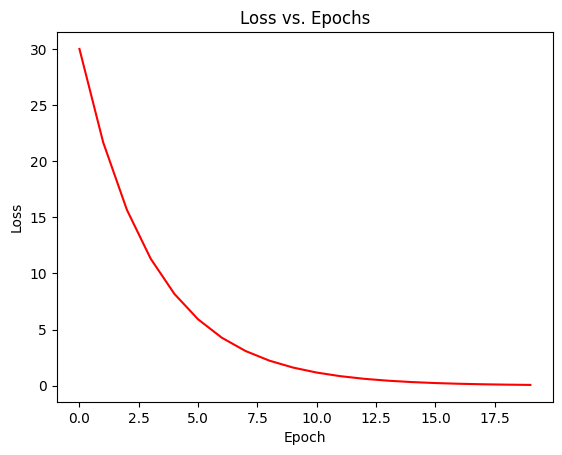

In [13]:
import matplotlib.pyplot as plt 

# Create the plots
fig = plt.figsize=(8, 10)

# Plot 1: Loss vs. Epochs
plt.plot(loss_history, 'r-')
plt.title("Loss vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

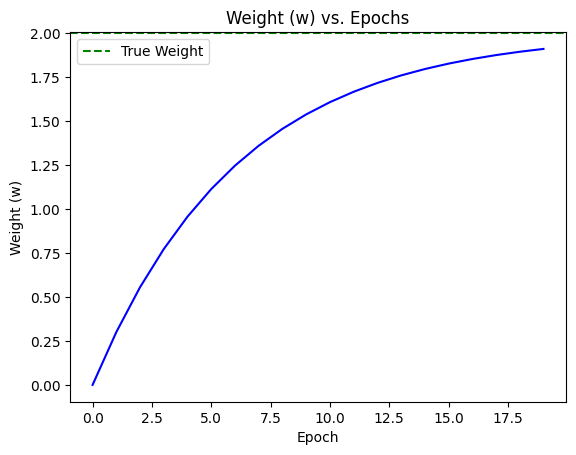

In [16]:
# Create the plots
fig = plt.figsize=(8, 10)

# Plot 2: Weight vs. Epochs
plt.plot(weights_history, 'b-')
plt.axhline(y=2.0, color='g', linestyle='--', label="True Weight") # Add line for the true weight
plt.title("Weight (w) vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("Weight (w)")
plt.legend()
plt.show()

While our example was simple, these exact principles: defining a model, calculating loss, and using autograd to update parameters, power the training of massive neural networks. 